In [2]:
setwd('/u-pan/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.fel/BJTC-204')

In [3]:
library("enrichR")
websiteLive <- getOption("enrichR.live")
if (websiteLive) {
    listEnrichrSites()
    setEnrichrSite("Enrichr") # Human genes   
}

if (websiteLive) dbs <- listEnrichrDbs()

dbs <- c("DSigDB",'KEGG_2019_Human','GO_Biological_Process_2023','GO_Molecular_Function_2023')
if (websiteLive) {
    enriched <- enrichr(c('HIST1H4C','PRSS3','TUSC3'), dbs)
}

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



Uploading data to Enrichr... Done.
  Querying DSigDB... Done.
  Querying KEGG_2019_Human... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [4]:
write.csv(enriched$DSigDB,file = './figure2/res3//target.dsig.csv')

In [5]:
write.csv(enriched$KEGG_2019_Human,file = './figure2/res3//target.kegg.csv')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


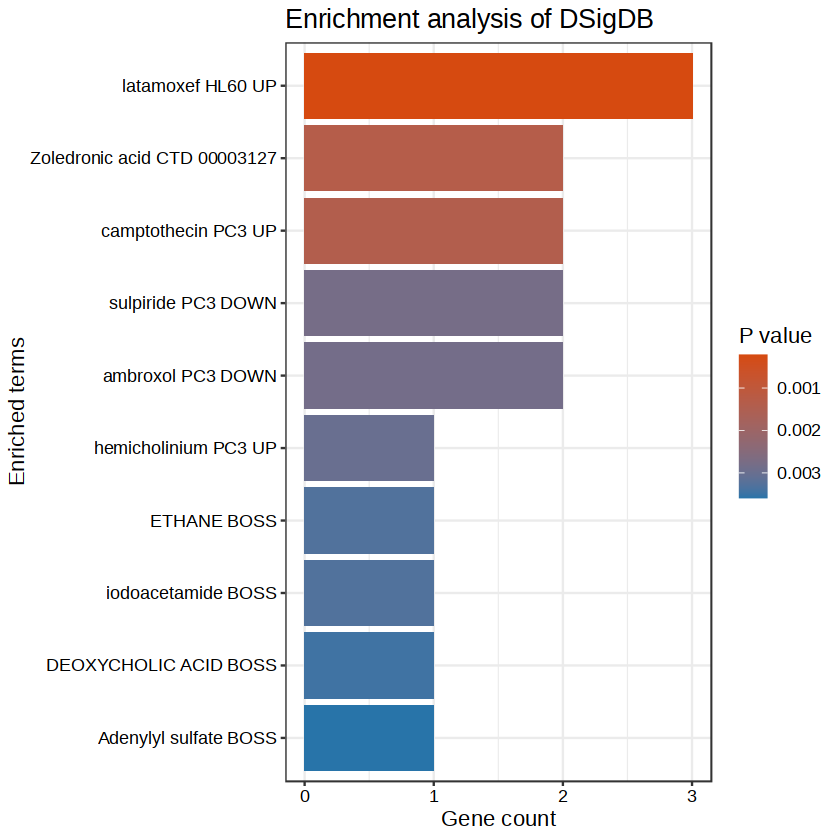

In [6]:
library(ggplot2)

if (websiteLive) {
    plotEnrich(enriched[[1]], showTerms = 10, numChar = 50, y = "Genes", orderBy = "P.value",title = 'Enrichment analysis of DSigDB')+
    theme(text=element_text(size= 13 ))+
    scale_fill_continuous(high = "#2874A9", low = "#D64A10")
}

In [7]:
library(ggplot2)

In [8]:
ggsave('./figure2/res3//drug.pdf',width = 6,height = 5)

In [10]:
kegg  = enriched[[2]]
kegg$logP = -log(kegg$P.value)
kegg1 = kegg[,c(1,9,10)]
library(igraph)
network <- graph_from_data_frame(d = kegg1[, c(1, 2, 3)], directed = FALSE)
deg <- degree(network, mode = "all")
genes <- unique(c(kegg1$Term,kegg1$Genes)) %>% as.data.frame()
colnames(genes) <- "type"
library(dplyr)
nodes <- genes %>% mutate(group = ifelse(type %in% c('HIST1H4C','PRSS3','TUSC3' ), "Gene", "Pathway"))
network <- graph_from_data_frame(d = kegg1, vertices = nodes, directed = FALSE)
my_color <- c("#66C2A5", "#FC8D62", "#8DA0CB")[as.numeric(as.factor(V(network)$group))]


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
options(repr.plot.width = 8,repr.plot.height = 8)
pdf(file = "./figure2/res3//ppi_network_kegg.pdf", width = 8, height = 8)
par(bg = "white", mar = c(1, 1, 1, 1
                         ))

plot(network, 
     vertex.size = deg*10,  
     layout = layout.circle,  
     vertex.color = my_color, 
     vertex.label.cex = 1,  
     vertex.label.color = "black",  
     vertex.frame.color = "transparent",  
     edge.width = E(network)$logP * 0.3, 
     edge.curved = 0.5)  
legend(x = 1, y = 1, 
       legend = unique(V(network)$group), 
       col = unique(my_color), 
       bty = "n",  
       pch = 20,  
       pt.cex = 4,  
       cex = 0.8,  
       text.col = "black",  
       horiz = FALSE,  
       y.intersp = 1.5)
dev.off()

png 
  2

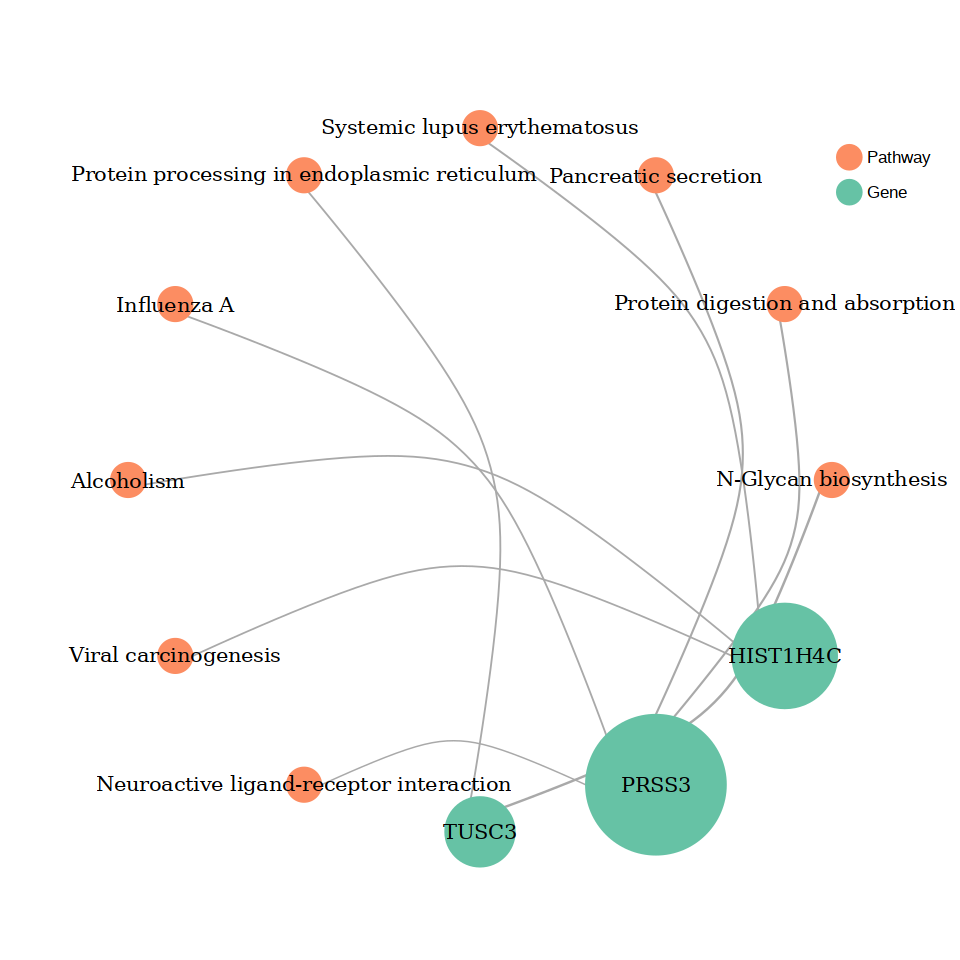

In [12]:
par(bg = "white", mar = c(1, 1, 1, 1
                         ))

plot(network, 
     vertex.size = deg*10,  
     layout = layout.circle,  
     vertex.color = my_color, 
     vertex.label.cex = 1,  
     vertex.label.color = "black",  
     vertex.frame.color = "transparent", 
     edge.width = E(network)$logP * 0.3, 
     edge.curved = 0.5)  
legend(x = 1, y = 1, 
       legend = unique(V(network)$group), 
       col = unique(my_color), 
       bty = "n", 
       pch = 20, 
       pt.cex = 4,  
       cex = 0.8,  
       text.col = "black",  
       horiz = FALSE,  
       y.intersp = 1.5)


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Magnesium Ion Transport,1/11,0.001649143,0.01406743,0,0,999.35000,6403.3348,TUSC3
Protein N-linked Glycosylation Via Asparagine,1/23,0.003446153,0.01406743,0,0,453.97727,2574.2766,TUSC3
Endothelial Cell Migration,1/40,0.005988231,0.01406743,0,0,255.87179,1309.5414,PRSS3
Zymogen Activation,1/45,0.006735079,0.01406743,0,0,226.73864,1133.7897,PRSS3
Epithelial Cell Migration,1/46,0.006884403,0.01406743,0,0,221.68889,1103.6774,PRSS3
Cognition,1/47,0.007033713,0.01406743,0,0,216.85870,1074.9773,TUSC3
Protein N-linked Glycosylation,1/64,0.009569690,0.01640518,0,0,158.20635,735.5258,TUSC3
Antimicrobial Humoral Response,1/100,0.014925739,0.02238861,0,0,100.49495,422.5479,PRSS3
Protein Processing,1/117,0.017448260,0.02326435,0,0,85.69397,346.9333,PRSS3


Warning message in layout[, 1] + label.dist * cos(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”
Warning message in layout[, 2] + label.dist * sin(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”


png 
  2

Warning message in layout[, 1] + label.dist * cos(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”
Warning message in layout[, 2] + label.dist * sin(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”


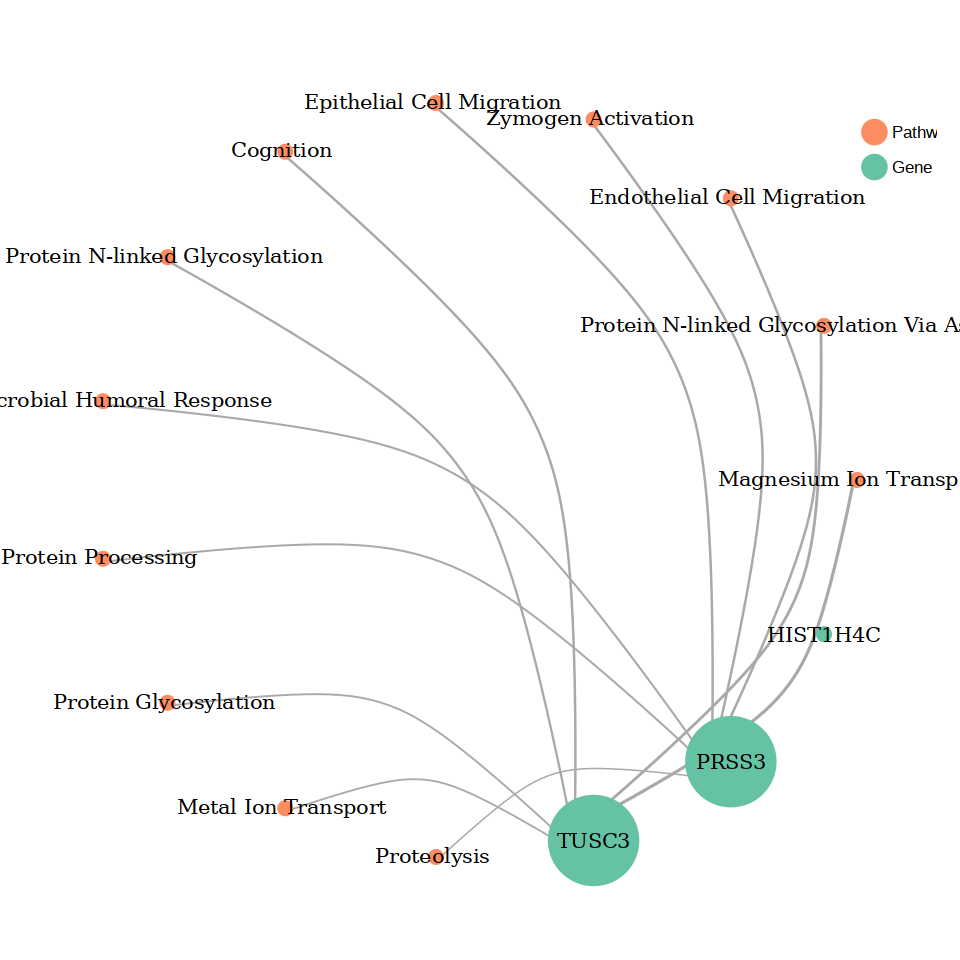

In [37]:
BP  = enriched[[3]]
BP$Term = gsub('[()]' ,'' ,BP$Term)
library(stringr)
BP$Term = str_sub(BP$Term, 1, -11)
BP
BP$logP = -log(BP$P.value)
BP1 = BP[,c(1,9,10)]
library(igrph)
network <- graph_from_data_frame(d = BP1[, c(1, 2, 3)], directed = FALSE)
deg <- degree(network, mode = "all")
genes <- unique(c(BP1$Term,kegg1$Genes)) %>% as.data.frame()
colnames(genes) <- "type"
library(dplyr)
nodes <- genes %>% mutate(group = ifelse(type %in% c('HIST1H4C','PRSS3','TUSC3' ), "Gene", "Pathway"))
network <- graph_from_data_frame(d = BP1, vertices = nodes, directed = FALSE)
my_color <- c("#66C2A5", "#FC8D62", "#8DA0CB")[as.numeric(as.factor(V(network)$group))]
pdf(file = "./figure2/res3//ppi_network_BP.pdf", width = 8, height = 8)
par(bg = "white", mar = c(1, 1, 1, 1
                         ))

plot(network, 
     vertex.size = deg*4,  
     layout = layout.circle, 
     vertex.color = my_color,  
     vertex.label.cex = 1,  
     vertex.label.color = "black",  
     vertex.frame.color = "transparent",  
     edge.width = E(network)$logP * 0.3,  
     edge.curved = 0.5) 
legend(x = 1, y = 1, 
       legend = unique(V(network)$group), 
       col = unique(my_color), 
       bty = "n", 
       pch = 20,  
       pt.cex = 4,  
       cex = 0.8, 
       text.col = "black", 
       horiz = FALSE,  
       y.intersp = 1.5)  
dev.off()

par(bg = "white", mar = c(1, 1, 1, 1
                         ))

plot(network, 
     vertex.size = deg*4,  
     layout = layout.circle, 
     vertex.color = my_color,  
     vertex.label.cex = 1,  
     vertex.label.color = "black",  
     vertex.frame.color = "transparent",  
     edge.width = E(network)$logP * 0.3,  
     edge.curved = 0.5)  

legend(x = 1, y = 1, 
       legend = unique(V(network)$group), 
       col = unique(my_color), 
       bty = "n", 
       pch = 20,  
       pt.cex = 4,  
       cex = 0.8,
       text.col = "black",  
       horiz = FALSE, 
       y.intersp = 1.5) 